#### 설명변수들의 차원을 줄이기 위해 사용가능, 주성분을 이용하여 반응변수의 설명력(예측력)을 높일 수 있다.
#### 설명변수들의 전체분산을 가장 잘 설명해주는 component를 사용하여 설명변수들간 다중공선성 문제를 해결할 수 있다.
#### 주요 component score들이 Y의 예측력을 보장하는 것은 아니다. 주요 component score는 X의 분산을 가장 잘 설명하는 방향의 축을 기준으로 변환된 것이기 때문에 Y와의 관계에 있어서는 상관성이 없을수도 있다.

In [3]:
wine <- read.csv('wine_aroma.csv')
attach(wine)
head(wine)

Mo,Ba,Cr,Sr,Pb,B,Mg,Ca,K,Aroma
0.044,0.387,0.029,1.230,0.561,2.63,128,80.5,1130,3.3
0.160,0.312,0.038,0.975,0.697,6.21,193,75.0,1010,4.4
0.146,0.308,0.035,1.140,0.730,3.05,127,91.0,1160,3.9
0.191,0.165,0.036,0.927,0.796,2.57,112,93.6,924,3.9
0.363,0.380,0.059,1.130,1.730,3.07,138,84.6,1090,5.6
0.106,0.275,0.019,1.050,0.491,6.56,172,112.0,1290,4.6


In [7]:
cor(wine[1:9])

,Mo,Ba,Cr,Sr,Pb,B,Mg,Ca,K
Mo,1.000000000,-0.005845794,0.43202327,-0.04506390,0.95042130,-0.10139057,0.27611679,0.3780829,-0.09162274
Ba,-0.005845794,1.000000000,0.03307179,0.82068003,0.09127673,-0.25386503,0.63209382,0.2412818,0.47869078
Cr,0.432023266,0.033071792,1.00000000,0.24604133,0.35372849,0.08280968,0.29126365,0.0991697,0.45139309
Sr,-0.045063901,0.820680029,0.24604133,1.00000000,-0.03084108,-0.32126815,0.72466545,0.2945248,0.59537471
Pb,0.950421296,0.091276726,0.35372849,-0.03084108,1.00000000,-0.19147512,0.25025455,0.3469484,-0.11247016
B,-0.101390567,-0.253865031,0.08280968,-0.32126815,-0.19147512,1.00000000,-0.01070072,0.0333600,0.29234044
Mg,0.276116791,0.632093823,0.29126365,0.72466545,0.25025455,-0.01070072,1.00000000,0.5025169,0.46953525
Ca,0.378082932,0.241281790,0.09916970,0.29452483,0.34694843,0.03336000,0.50251687,1.0000000,0.42669707
K,-0.091622741,0.478690782,0.45139309,0.59537471,-0.11247016,0.29234044,0.46953525,0.4266971,1.00000000


In [8]:
# PCA(center=T ->mean=0, scale=T -> variance=1)
wi.pca <- prcomp(wine[1:9], center=T, scale=F)
wi.pca

Standard deviations (1, .., p=9):
[1] 191.34178051  27.33235332  15.40582103   1.57383189   0.41900698
[6]   0.17041133   0.05942324   0.02365329   0.01089562

Rotation (n x k) = (9 x 9):
             PC1           PC2           PC3           PC4          PC5
Mo  4.396532e-05  1.531130e-03 -0.0016925110  6.688447e-05 -0.188670999
Ba -2.644028e-04  1.588626e-03  0.0016225184  2.310870e-02  0.006670829
Cr -4.594881e-05  3.640528e-05  0.0002075367  5.172124e-04 -0.022994509
Sr -1.386527e-03  7.314677e-03  0.0074873569  1.258356e-01  0.183855603
Pb  2.621301e-04  6.962105e-03 -0.0076524788  2.814073e-02 -0.964311791
B  -2.516393e-03 -1.071784e-02  0.0005113384 -9.913097e-01 -0.003970591
Mg -7.437057e-02  9.302614e-01  0.3589981755 -1.087874e-02  0.001918085
Ca -4.369679e-02  3.565893e-01 -0.9331669873 -3.859202e-03  0.010450686
K  -9.962686e-01 -8.506499e-02  0.0141159901  3.311344e-03 -0.001110159
            PC6           PC7           PC8           PC9
Mo -0.029428376  2.844720e-01 -9.2

In [9]:
summary(wi.pca)

Importance of components:
                            PC1      PC2      PC3     PC4   PC5    PC6     PC7
Standard deviation     191.3418 27.33235 15.40582 1.57383 0.419 0.1704 0.05942
Proportion of Variance   0.9738  0.01987  0.00631 0.00007 0.000 0.0000 0.00000
Cumulative Proportion    0.9738  0.99362  0.99993 0.99999 1.000 1.0000 1.00000
                           PC8    PC9
Standard deviation     0.02365 0.0109
Proportion of Variance 0.00000 0.0000
Cumulative Proportion  1.00000 1.0000

#### PC1은 전체분산의 97.38%를 설명, 1개의 변수만으로도 독립변수 전체분산을 거의 설명

## scree plot

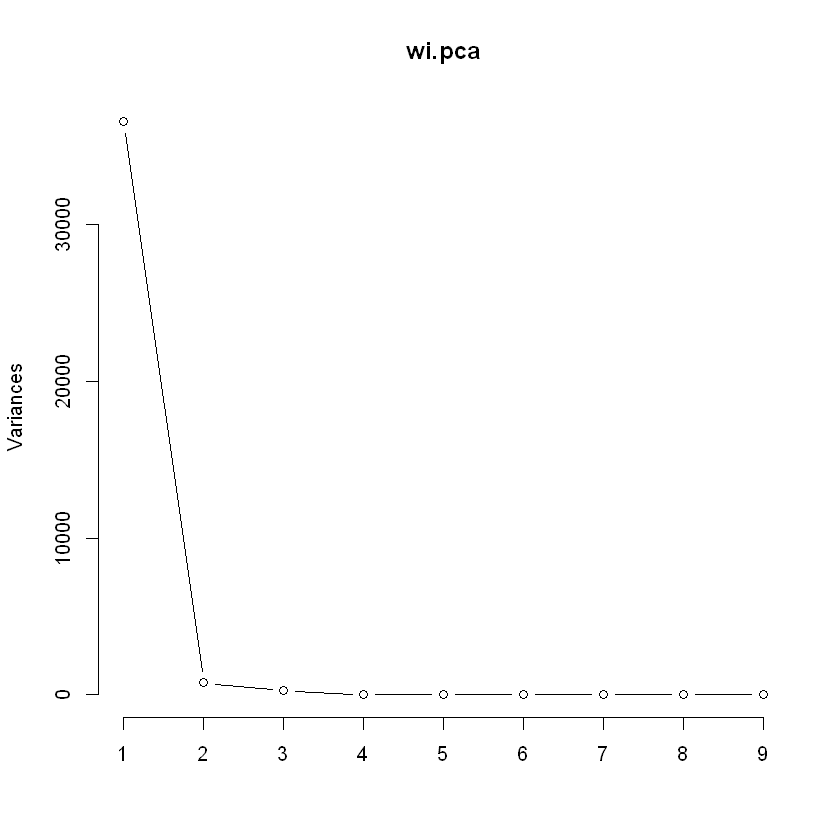

In [11]:
plot(wi.pca, type='l')

#### 이 경우 PC1 한 개만 사용해도 될듯

In [12]:
PRC <- as.matrix(wine[,1:9]) %*% wi.pca$rotation
head(PRC)

PC1,PC2,PC3,PC4,PC5,PC6,PC7,PC8,PC9
-1138.8289,51.64087,-13.21029,-0.3889438,-0.4993510,0.4769412,-0.17273149,0.0430609304,-0.009768975
-1023.8790,120.31518,13.56166,-5.0510679,-0.5137726,0.7069155,-0.11965383,0.0006446114,-0.016643552
-1169.1022,51.89889,-22.94611,-0.7439815,-0.6259345,0.4848385,-0.09485616,0.0012283896,-0.022104523
-932.9793,58.95133,-34.09134,-0.9247297,-0.4759034,0.3602776,0.01246438,0.0015861301,-0.018329233
-1099.9016,65.81126,-14.02094,-1.0619959,-1.6012517,0.3328149,-0.12081531,-0.0283316970,-0.017569226
-1302.8902,90.15052,-24.54966,-4.3824147,-0.2567956,0.6480738,-0.09530135,0.0254539117,-0.034066209


In [13]:
wine.pc <- cbind(as.data.frame(PRC), Aroma)
head(wine.pc)

PC1,PC2,PC3,PC4,PC5,PC6,PC7,PC8,PC9,Aroma
-1138.8289,51.64087,-13.21029,-0.3889438,-0.4993510,0.4769412,-0.17273149,0.0430609304,-0.009768975,3.3
-1023.8790,120.31518,13.56166,-5.0510679,-0.5137726,0.7069155,-0.11965383,0.0006446114,-0.016643552,4.4
-1169.1022,51.89889,-22.94611,-0.7439815,-0.6259345,0.4848385,-0.09485616,0.0012283896,-0.022104523,3.9
-932.9793,58.95133,-34.09134,-0.9247297,-0.4759034,0.3602776,0.01246438,0.0015861301,-0.018329233,3.9
-1099.9016,65.81126,-14.02094,-1.0619959,-1.6012517,0.3328149,-0.12081531,-0.0283316970,-0.017569226,5.6
-1302.8902,90.15052,-24.54966,-4.3824147,-0.2567956,0.6480738,-0.09530135,0.0254539117,-0.034066209,4.6


## 1

In [15]:
fit1 <- lm(Aroma ~ PC1, wine.pc)
summary(fit1)


Call:
lm(formula = Aroma ~ PC1, data = wine.pc)

Residuals:
     Min       1Q   Median       3Q      Max 
-2.01505 -0.61186  0.05833  0.66342  2.15282 

Coefficients:
             Estimate Std. Error t value Pr(>|t|)    
(Intercept) 7.7448471  0.9545674   8.113 1.49e-09 ***
PC1         0.0025532  0.0008408   3.037   0.0045 ** 
---
Signif. codes:  0 '***' 0.001 '**' 0.01 '*' 0.05 '.' 0.1 ' ' 1

Residual standard error: 0.9653 on 35 degrees of freedom
Multiple R-squared:  0.2085,	Adjusted R-squared:  0.1859 
F-statistic: 9.221 on 1 and 35 DF,  p-value: 0.004497


### $R^2$=0.1859이 너무 작음

## 2

In [16]:
fit2 <- lm(Aroma ~ PC1 + PC2 + PC3 + PC4, wine.pc)
summary(fit2)


Call:
lm(formula = Aroma ~ PC1 + PC2 + PC3 + PC4, data = wine.pc)

Residuals:
     Min       1Q   Median       3Q      Max 
-1.37626 -0.66068  0.00352  0.48748  1.35150 

Coefficients:
              Estimate Std. Error t value Pr(>|t|)    
(Intercept)  7.7499387  0.8204063   9.446 8.96e-11 ***
PC1          0.0025532  0.0006629   3.852 0.000530 ***
PC2         -0.0147475  0.0046404  -3.178 0.003279 ** 
PC3          0.0031120  0.0082328   0.378 0.707924    
PC4         -0.3022774  0.0805886  -3.751 0.000701 ***
---
Signif. codes:  0 '***' 0.001 '**' 0.01 '*' 0.05 '.' 0.1 ' ' 1

Residual standard error: 0.761 on 32 degrees of freedom
Multiple R-squared:  0.5502,	Adjusted R-squared:  0.494 
F-statistic: 9.787 on 4 and 32 DF,  p-value: 2.749e-05


#### 변수 중요도가 PC1 > PC2 > PC3 > PC4이지만 PC3는 X를 잘 설명하지만 Y를 잘 설명하지 못하는걸 볼 수 있다.

## 3

In [17]:
fit3 <- lm(Aroma ~ ., wine.pc)
summary(fit3)


Call:
lm(formula = Aroma ~ ., data = wine.pc)

Residuals:
     Min       1Q   Median       3Q      Max 
-0.86916 -0.32577 -0.02585  0.25665  0.92525 

Coefficients:
              Estimate Std. Error t value Pr(>|t|)    
(Intercept)  5.738e+00  7.174e-01   7.998 1.35e-08 ***
PC1          2.553e-03  4.741e-04   5.386 1.08e-05 ***
PC2         -1.475e-02  3.319e-03  -4.444 0.000136 ***
PC3          3.112e-03  5.888e-03   0.529 0.601455    
PC4         -3.023e-01  5.764e-02  -5.244 1.58e-05 ***
PC5         -9.251e-01  2.165e-01  -4.273 0.000214 ***
PC6          1.695e+00  5.323e-01   3.184 0.003639 ** 
PC7         -1.002e+00  1.527e+00  -0.656 0.517085    
PC8         -7.910e+00  3.835e+00  -2.062 0.048902 *  
PC9         -1.309e+01  8.326e+00  -1.573 0.127409    
---
Signif. codes:  0 '***' 0.001 '**' 0.01 '*' 0.05 '.' 0.1 ' ' 1

Residual standard error: 0.5443 on 27 degrees of freedom
Multiple R-squared:  0.8059,	Adjusted R-squared:  0.7412 
F-statistic: 12.45 on 9 and 27 DF,  p-value: 1

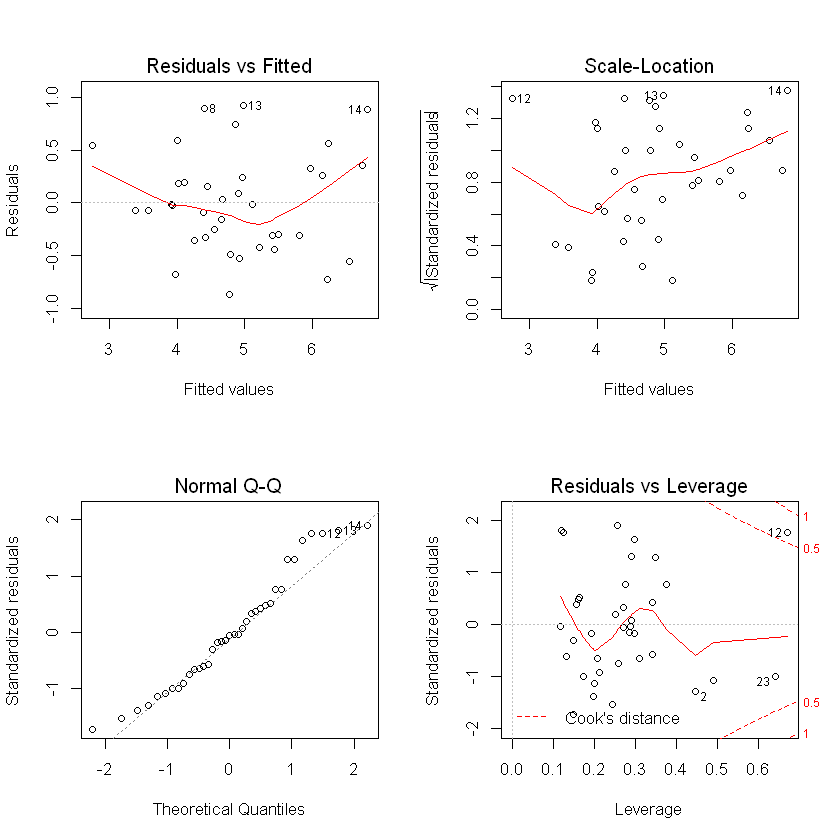

In [18]:
layout(matrix(c(1,2,3,4),2,2))
plot(fit3)